In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from simulations import MARRON_WAND_SIMS, INDEPENDENCE_SIMS

In [6]:
sns.set_theme(color_codes=True, style="white", context="talk", font_scale=1.5)
PALETTE = sns.color_palette("Set1", n_colors=8)
PALETTE = PALETTE[:5] + PALETTE[6:]
PALETTE.reverse()
sns.set_palette(PALETTE)

FIG_PATH = "figs"

TESTS = [
    "KMERF",
    "MGC",
    "Dcorr",
    "Hsic",
    "HHG",
    "CCA",
    "RV",
]

In [15]:
def plot_power(fig_name=None):
    INDEPENDENCE_CUSTOM_TITLES = {
        "w_shaped": "W-Shaped",
        "uncorrelated_bernoulli": "Bernoulli",
        "sin_four_pi": "Sine 4\u03C0",
        "sin_sixteen_pi": "Sine 16\u03C0",
        "multiplicative_noise": "Noise",
        "multimodal_independence": "Independent",
    }
    if fig_name[-1] == "d":
        sample_dimensions = range(3, 11)
    elif fig_name[-1] == "n":
        sample_dimensions = range(10, 110, 10)
    else:
        raise ValueError(f"fig_name is {fig_name}; must end in d or n")

    if "two-sample" in fig_name:
        simulations = {
            sim: " ".join([s.capitalize() for s in sim.split("_")])
            for sim in MARRON_WAND_SIMS.keys()
        }
        nrows, ncols = 3, 5
    elif "independence" in fig_name:
        simulations = {
            sim: " ".join(
                [s.capitalize() for s in sim.split("_")]
                if sim not in INDEPENDENCE_CUSTOM_TITLES.keys()
                else INDEPENDENCE_CUSTOM_TITLES[sim]
            )
            for sim in INDEPENDENCE_SIMS
        }
        nrows, ncols = 4, 5
    else:
        raise ValueError(
            f"fig_name is {fig_name}; must contain two-sample or independence"
        )

    _, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 12))

    for r, row in enumerate(ax):
        for c, col in enumerate(row):
            sim = list(simulations)[ncols * r + c]
            col.axhline(y=0.05, linestyle=":", color="#000000", label="Alpha")

            for test in TESTS[::-1]:
                xs = sample_dimensions
                try:
                    ys = np.genfromtxt(
                        f"{fig_name}/{sim}-{test}-{fig_name}.csv",
                        delimiter=",",
                    )
                except FileNotFoundError:
                    continue
                plot_kwargs = {"lw": 3}
                if test == "KMERF":
                    plot_kwargs = {"color": "#e41a1c", "lw": 4}
                col.plot(xs, ys, label=test, **plot_kwargs)

            col.set(
                xscale="linear",
                title=(
                    "Asymmetric\nDouble Claw"
                    if sim == "asymmetric_double_claw"
                    else simulations[sim]
                ),
                xlabel=(
                    "# of Dimensions"
                    if r == 2 and c == 2 and fig_name[-1] == "d"
                    else (
                        "Sample Size"
                        if r == 2 and c == 2 and fig_name[-1] == "n"
                        else ""
                    )
                ),
                ylabel=(
                    "Power for 100 Samples"
                    if r == 1 and c == 0 and fig_name[-1] == "d"
                    else (
                        "Power for 3 Dimensions"
                        if r == 1 and c == 0 and fig_name[-1] == "n"
                        else ""
                    )
                ),
                yticks=([0, 1] if c == 0 else []),
                ylim=[-0.01, 1.01],
                xticks=(
                    [sample_dimensions[0], sample_dimensions[-1]] if r == 2 else []
                ),
            )
            sns.despine(right=True)
            plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)

    leg = plt.legend(
        bbox_to_anchor=(0.5, 0),
        bbox_transform=plt.gcf().transFigure,
        ncol=len(TESTS) + 1,
        loc="upper center",
        reverse=True,
    )
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legend_handles:
        legobj.set_linewidth(5.0)

    plt.savefig(f"{FIG_PATH}/{fig_name}.pdf", transparent=True, bbox_inches='tight')

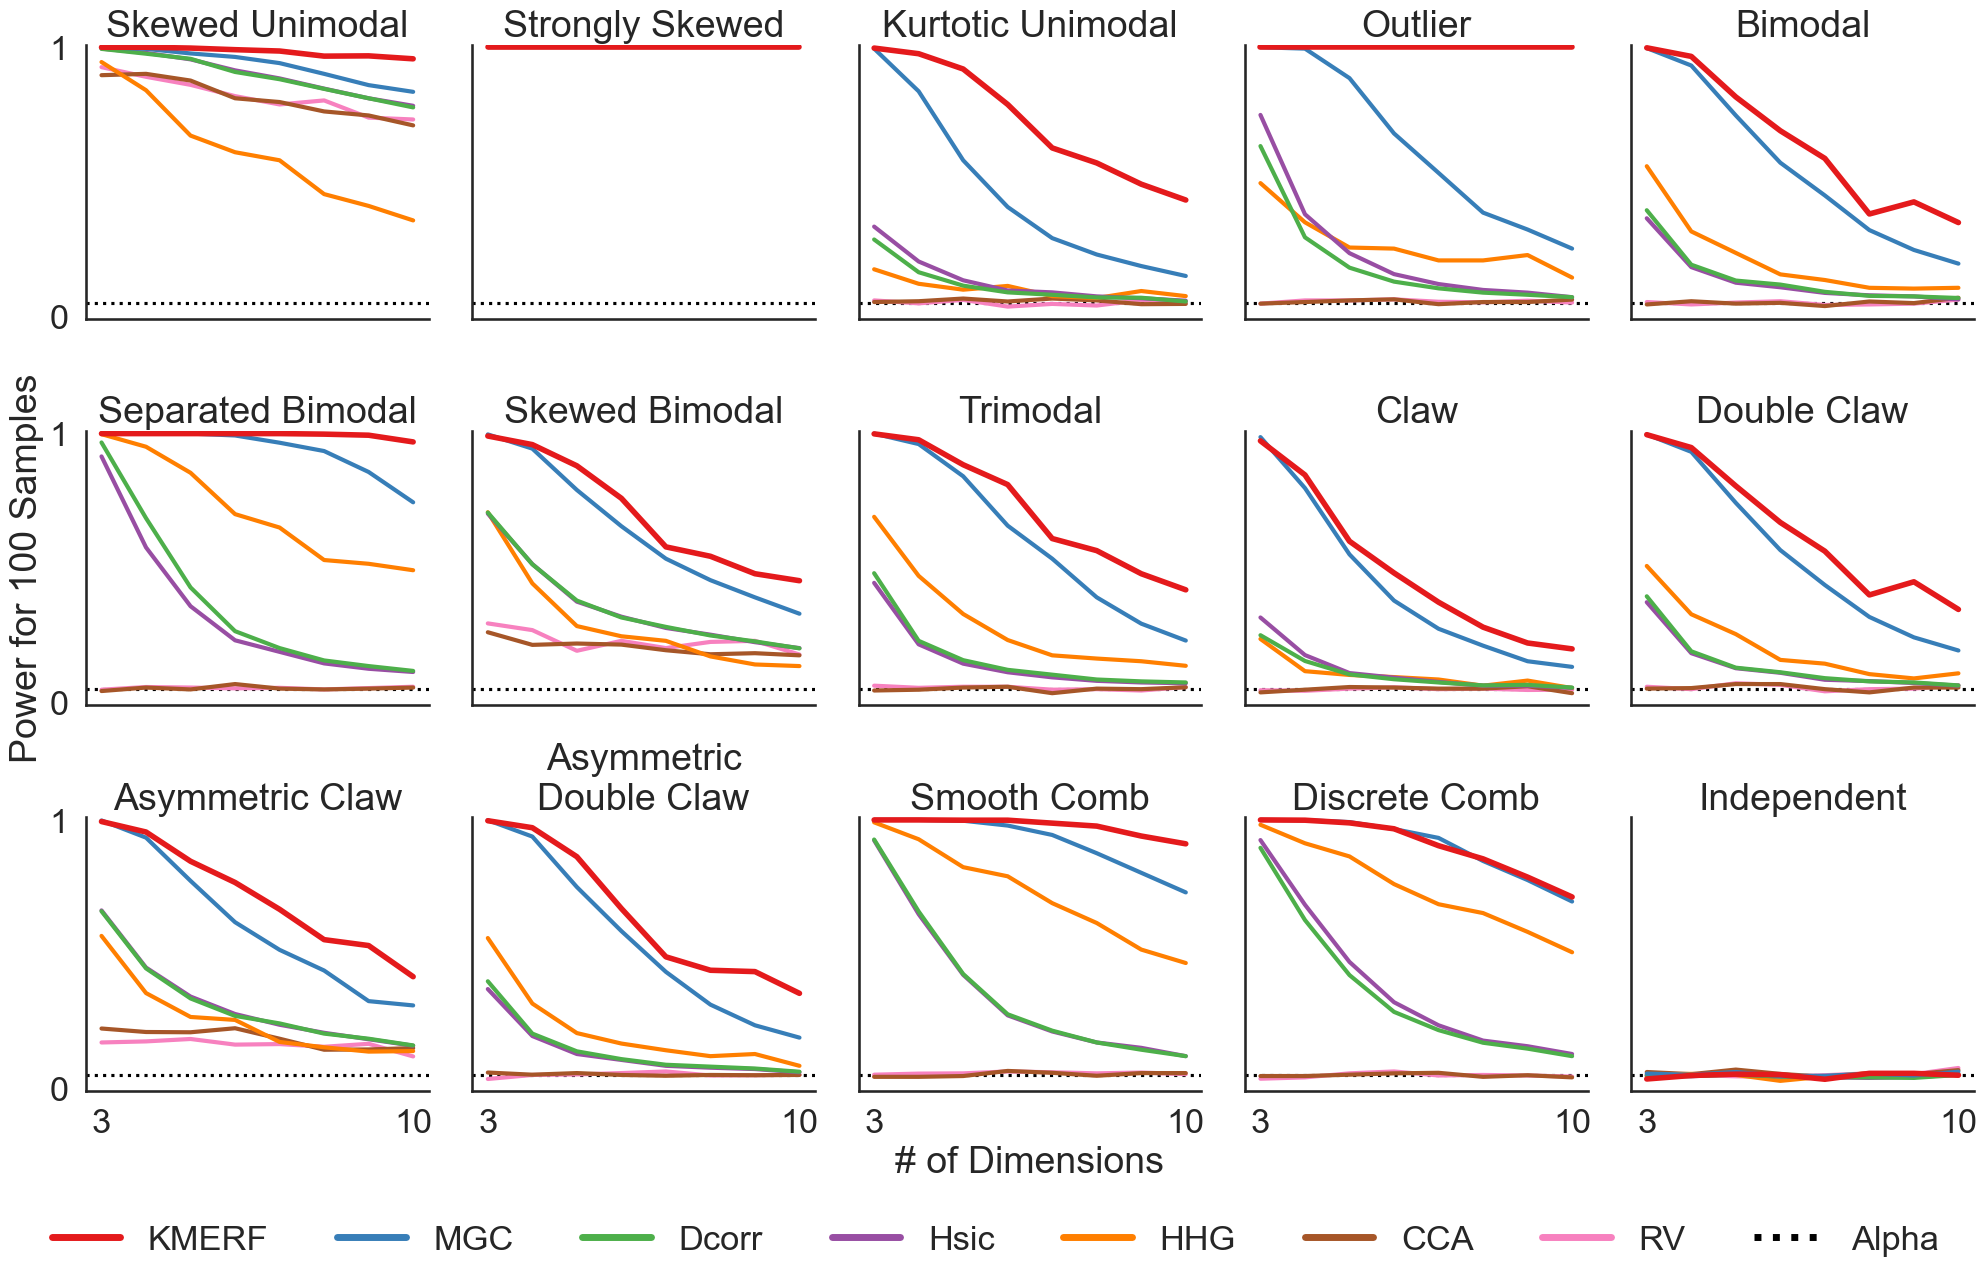

In [16]:
plot_power("two-sample-power-vs-d")

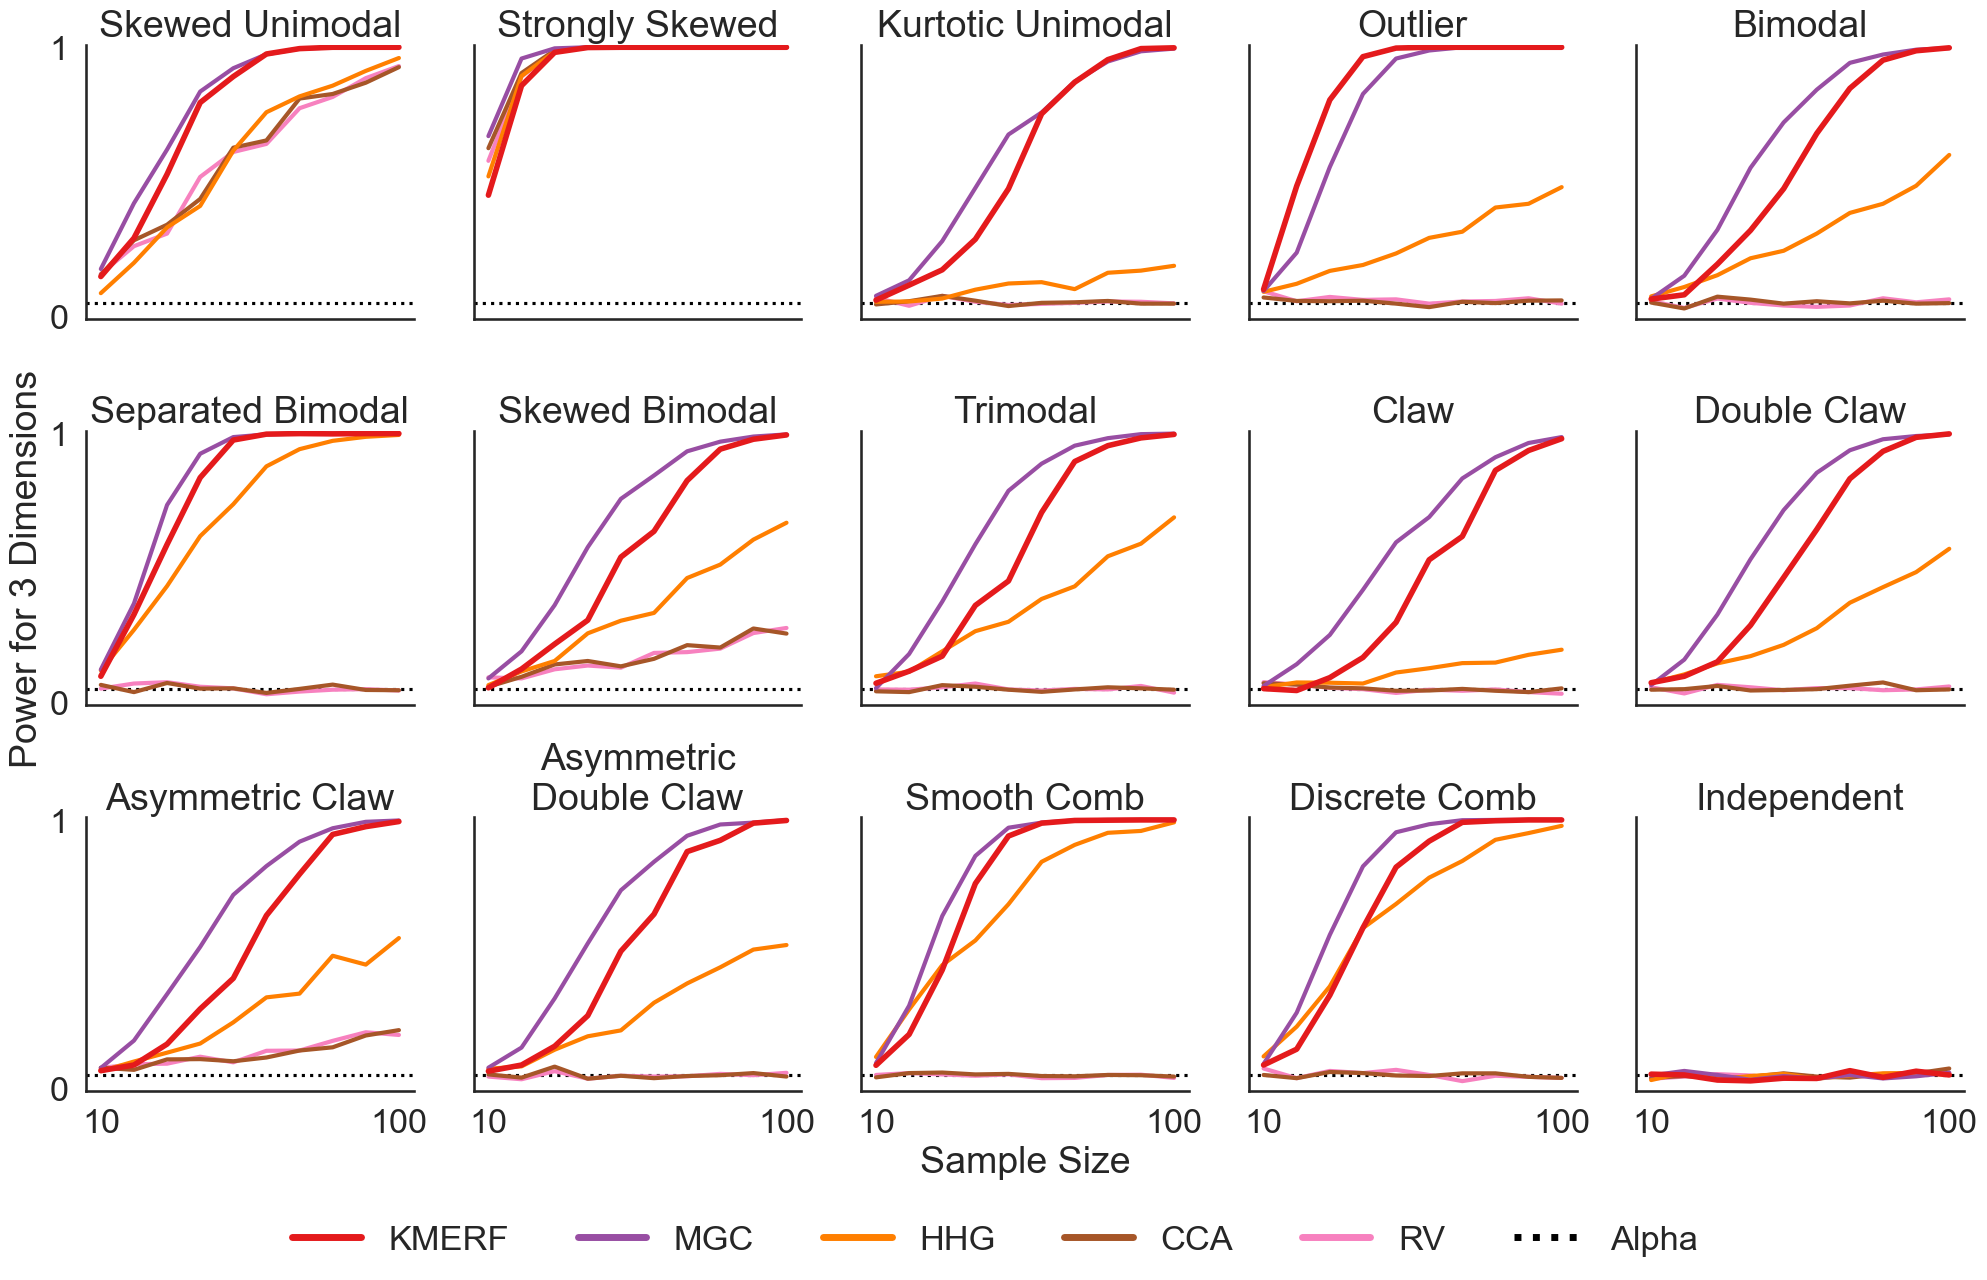

In [17]:
plot_power("two-sample-power-vs-n")